<a href="https://colab.research.google.com/github/VigneshNallamothu/SpeechEmotionDetection/blob/main/Group7_SpeechEmotionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Group 7 : Speech Emotion Detection**

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nagavamsidharreddy","key":"108d09473f4fd1adb8bf206cb9cc715b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d dmitrybabko/speech-emotion-recognition-en
!unzip speech-emotion-recognition-en -d speech-emotion-recognition-en

Streaming output truncated to the last 5000 lines.
  inflating: speech-emotion-recognition-en/Crema/1088_IWW_FEA_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_IWW_HAP_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_IWW_NEU_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_IWW_SAD_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_MTI_ANG_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_MTI_DIS_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_MTI_FEA_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_MTI_HAP_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_MTI_NEU_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_MTI_SAD_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_TAI_ANG_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_TAI_DIS_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_TAI_FEA_XX.wav  
  inflating: speech-emotio

**Importing Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import IPython
from IPython.display import Audio
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Flatten, Dense, Dropout
from keras.models import Sequential
import re
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

**Loading Crema Dataset**

In [ ]:
Crema='/content/speech-emotion-recognition-en/Crema'

In [ ]:
crema=[]
for wav in os.listdir(Crema):
    emotion=wav.partition(".wav")[0].split('_')
    if emotion[2]=='SAD':
        crema.append(('sad',Crema+'/'+wav))
    elif emotion[2]=='ANG':
        crema.append(('angry',Crema+'/'+wav))
    elif emotion[2]=='DIS':
        crema.append(('disgust',Crema+'/'+wav))
    elif emotion[2]=='FEA':
        crema.append(('fear',Crema+'/'+wav))
    elif emotion[2]=='HAP':
        crema.append(('happy',Crema+'/'+wav))
    elif emotion[2]=='NEU':
        crema.append(('neutral',Crema+'/'+wav))
    else:
        crema.append(('unknown',Crema+'/'+wav))

Cr_df = pd.DataFrame.from_dict(crema)
Cr_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Cr_df.head()

,Emotion,File_Path
0,happy,/content/speech-emotion-recognition-en/Crema/1...
1,happy,/content/speech-emotion-recognition-en/Crema/1...
2,angry,/content/speech-emotion-recognition-en/Crema/1...
3,neutral,/content/speech-emotion-recognition-en/Crema/1...
4,neutral,/content/speech-emotion-recognition-en/Crema/1...


In [ ]:
Cr_df['Emotion'].unique()

array(['happy', 'angry', 'neutral', 'fear', 'sad', 'disgust'],
      dtype=object)

In [ ]:
d = Cr_df
d.to_csv("data_path.csv",index=False)
d.head()

,Emotion,File_Path
0,happy,/content/speech-emotion-recognition-en/Crema/1...
1,happy,/content/speech-emotion-recognition-en/Crema/1...
2,angry,/content/speech-emotion-recognition-en/Crema/1...
3,neutral,/content/speech-emotion-recognition-en/Crema/1...
4,neutral,/content/speech-emotion-recognition-en/Crema/1...


**Visualizing number of Emotions**

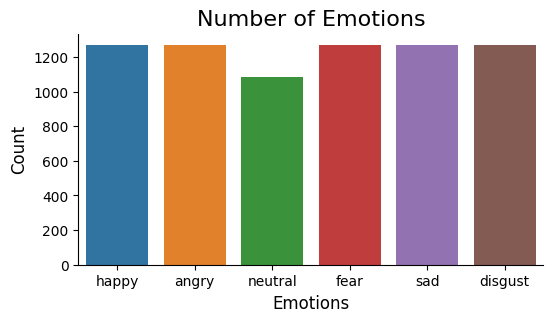

In [ ]:
plt.figure(figsize=(6,3))
plt.title('Number of Emotions', size=16)
emotions=sns.countplot(x='Emotion',data=d)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

**Defining and Visualizing waveplots and Spectrograms for all Emotions**

In [ ]:
def waveplot(data, sr, e):
    plt.figure(figsize=(6, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

In [ ]:
def spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(6, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

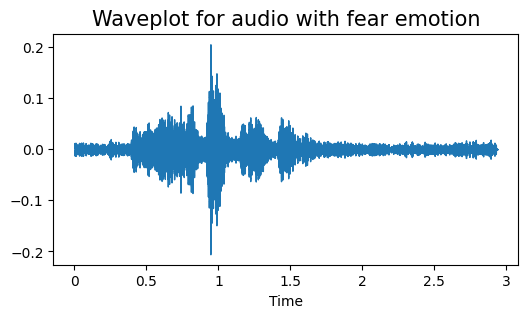

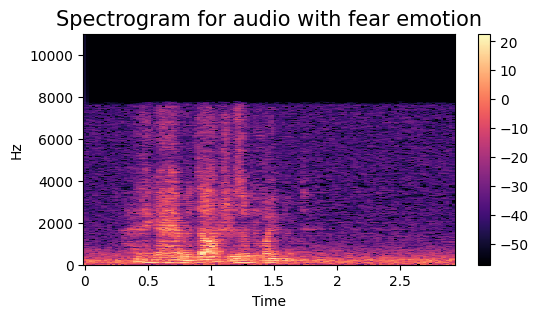

In [ ]:
emotion='fear'
path = np.array(d['File_Path'][d['Emotion']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

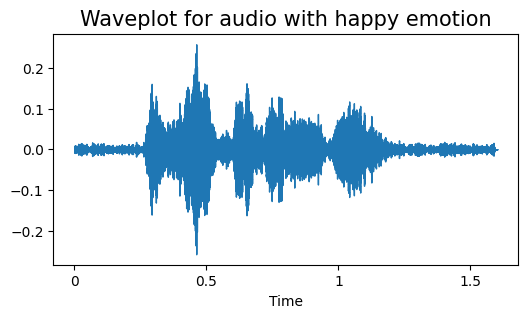

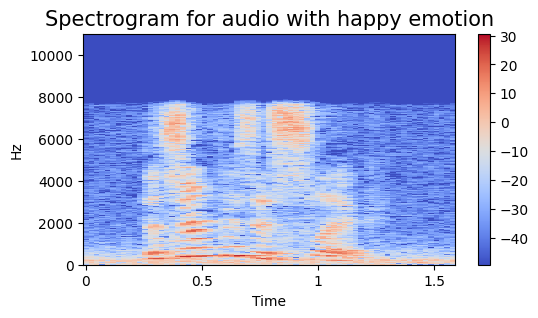

In [ ]:
emotion='happy'
path = np.array(d['File_Path'][d['Emotion']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

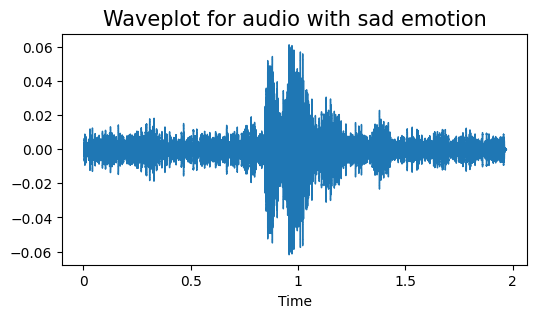

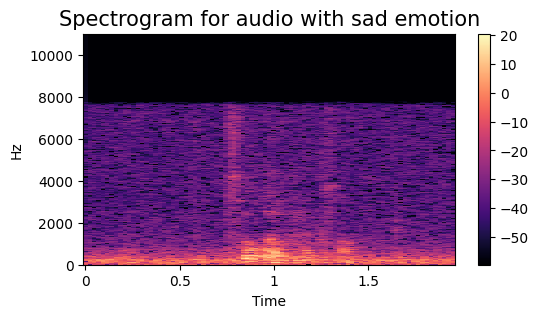

In [ ]:
emotion='sad'
path = np.array(d['File_Path'][d['Emotion']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

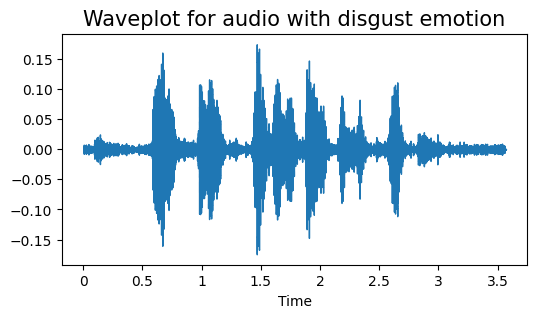

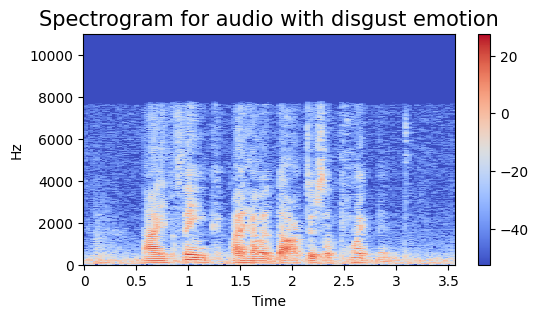

In [ ]:
emotion='disgust'
path = np.array(d['File_Path'][d['Emotion']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

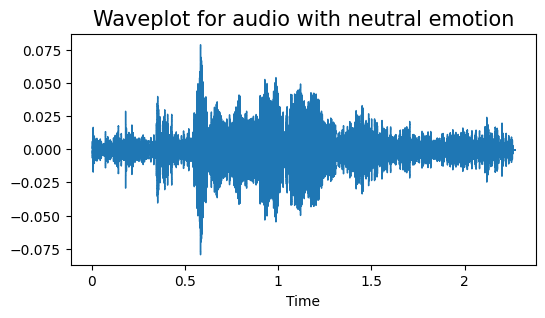

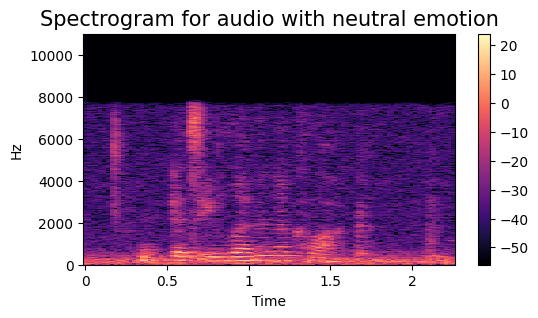

In [ ]:
emotion='neutral'
path = np.array(d['File_Path'][d['Emotion']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

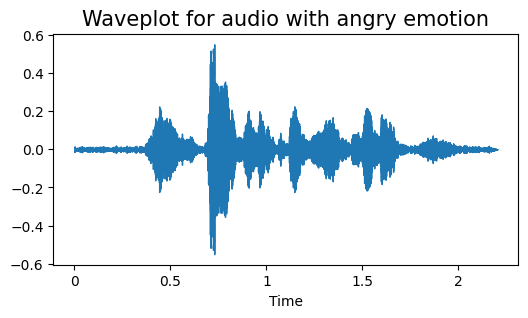

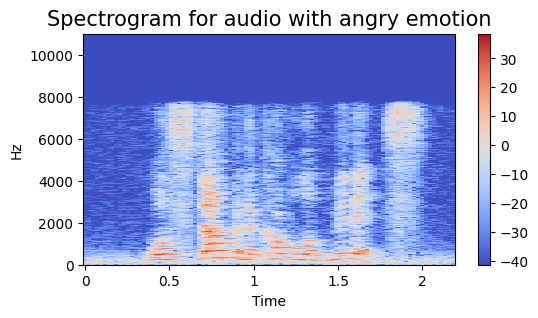

In [ ]:
emotion='angry'
path = np.array(d['File_Path'][d['Emotion']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

**Data Augmentation**

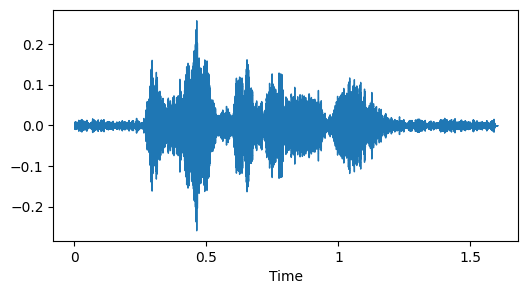

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data):
    return librosa.effects.time_stretch(data, rate=0.8)

def shift(data):
    shift_ranges = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_ranges)

path = np.array(d.File_Path)[1]
data, sample_rate = librosa.load(path)

plt.figure(figsize=(6,3))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

**Adding Noise**

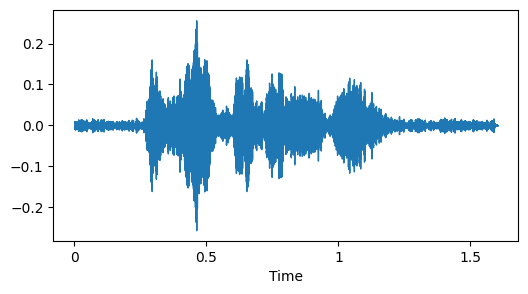

In [ ]:
x = noise(data)
plt.figure(figsize=(6,3))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

**Shifting**

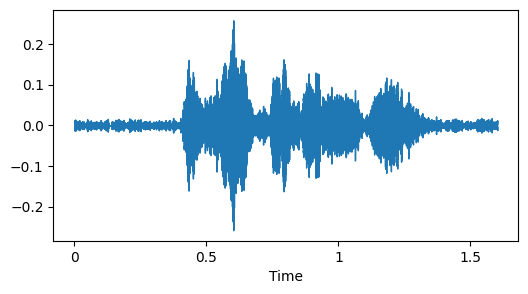

In [ ]:
x = shift(data)
plt.figure(figsize=(6,3))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

**Streching**

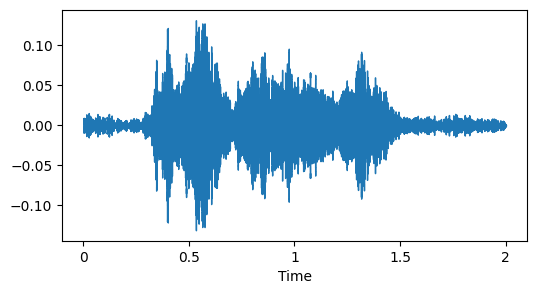

In [ ]:
x = stretch(data)
plt.figure(figsize=(6,3))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

**Feature Extraction**

In [ ]:
def extract_features(data):

    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr))

    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))

    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))

    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))

    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))

    return result

In [ ]:
def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    res1 = extract_features(data)
    result = np.array(res1)

    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))

    return result

In [ ]:
X, Y = [], []
for path, emotion in zip(d.File_Path, d.Emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [ ]:
len(X), len(Y), d.File_Path.shape

(14884, 14884, (7442,))

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.050933,0.577251,0.580431,0.668046,0.747505,0.667869,0.598705,0.664548,0.674042,0.675409,...,1.922800e-06,1.784285e-06,1.686126e-06,1.613091e-06,1.558763e-06,1.519801e-06,1.491526e-06,1.473291e-06,1.461983e-06,happy
1,0.217701,0.742815,0.731840,0.767087,0.870978,0.812340,0.685384,0.657984,0.686713,0.680610,...,1.132355e-03,1.188165e-03,1.112526e-03,9.619997e-04,1.113751e-03,1.153564e-03,1.156156e-03,1.135087e-03,1.132666e-03,happy
2,0.126365,0.544465,0.582963,0.560858,0.578869,0.598113,0.570702,0.597869,0.623768,0.669793,...,4.616572e-10,4.005057e-10,3.650872e-10,3.433789e-10,3.298890e-10,3.216960e-10,3.167557e-10,3.141900e-10,3.126805e-10,happy
3,0.182417,0.628738,0.651852,0.652112,0.684905,0.674085,0.588805,0.636055,0.660820,0.753786,...,3.451713e-04,3.751777e-04,3.491935e-04,3.754020e-04,3.751870e-04,3.486056e-04,3.629032e-04,3.715894e-04,3.459820e-04,happy
4,0.082357,0.599794,0.583948,0.593497,0.612858,0.686968,0.680311,0.663062,0.721007,0.687780,...,9.414770e-10,8.280364e-10,7.476194e-10,6.879048e-10,6.431768e-10,6.102197e-10,5.860649e-10,5.698192e-10,5.599430e-10,angry


**Data Preparation**

In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11163, 162), (11163, 6), (3721, 162), (3721, 6))

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11163, 162), (11163, 6), (3721, 162), (3721, 6))

In [ ]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11163, 162, 1), (11163, 6), (3721, 162, 1), (3721, 6))

**CNN Model**

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 162, 256)          1536      
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 81, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_9 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 41, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_10 (Conv1D)          (None, 41, 128)           163968    
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 21, 128)          

In [ ]:
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
175/175 [==============================] - 85s 427ms/step - loss: 1.6235 - accuracy: 0.3041 - val_loss: 1.5285 - val_accuracy: 0.3426
Epoch 2/50
175/175 [==============================] - 75s 428ms/step - loss: 1.5292 - accuracy: 0.3514 - val_loss: 1.4765 - val_accuracy: 0.3779
Epoch 3/50
175/175 [==============================] - 77s 440ms/step - loss: 1.5082 - accuracy: 0.3698 - val_loss: 1.4485 - val_accuracy: 0.3959
Epoch 4/50
175/175 [==============================] - 74s 425ms/step - loss: 1.4762 - accuracy: 0.3835 - val_loss: 1.4297 - val_accuracy: 0.4141
Epoch 5/50
175/175 [==============================] - 78s 447ms/step - loss: 1.4417 - accuracy: 0.4014 - val_loss: 1.4312 - val_accuracy: 0.4104
Epoch 6/50
175/175 [==============================] - 76s 438ms/step - loss: 1.4195 - accuracy: 0.4166 - val_loss: 1.4015 - val_accuracy: 0.4359
Epoch 7/50
175/175 [==============================] - 79s 453ms/step - loss: 1.3985 - accuracy: 0.4263 - val_loss: 1.3900 - val_ac

**Visualizing the Accuracy Plots**

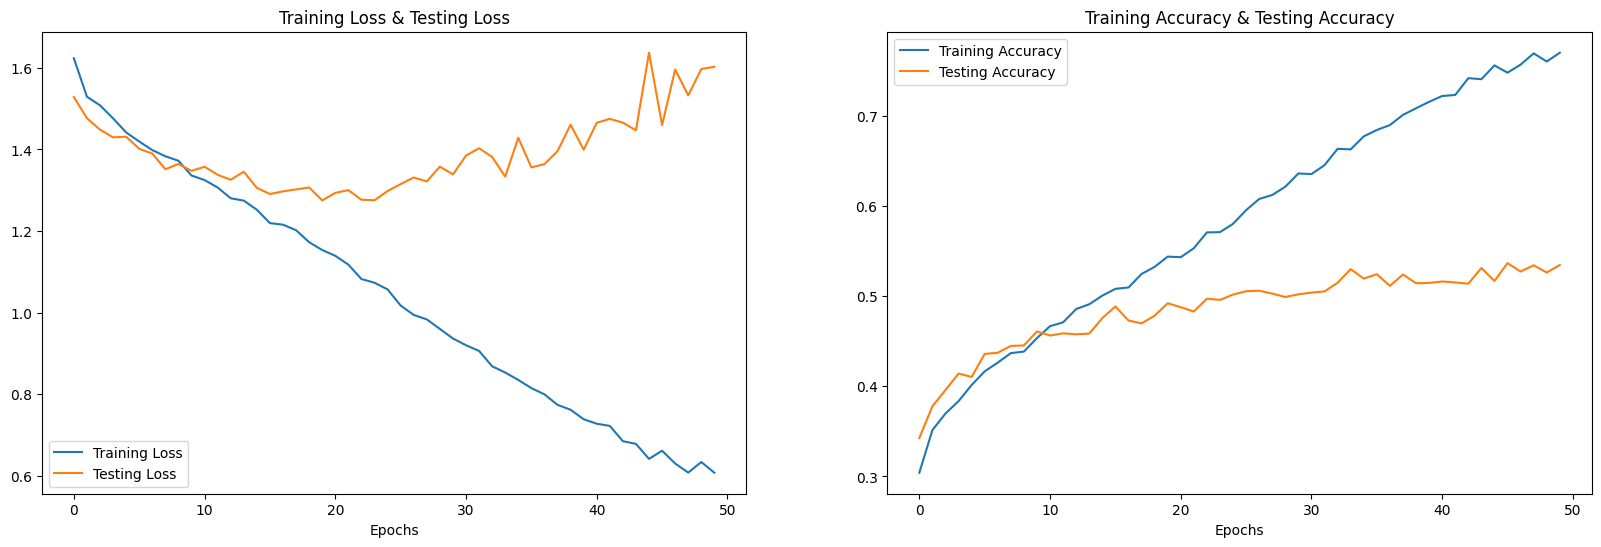

In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training Loss & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training Accuracy & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

117/117 [==============================] - 6s 48ms/step


In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,neutral,neutral
1,neutral,neutral
2,happy,angry
3,neutral,fear
4,neutral,neutral
5,angry,angry
6,sad,fear
7,sad,fear
8,happy,happy
9,sad,fear


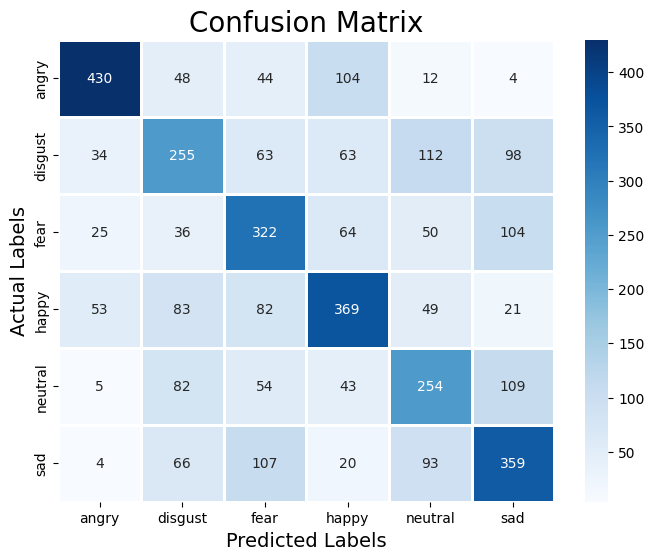

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.78      0.67      0.72       642
     disgust       0.45      0.41      0.43       625
        fear       0.48      0.54      0.51       601
       happy       0.56      0.56      0.56       657
     neutral       0.45      0.46      0.45       547
         sad       0.52      0.55      0.53       649

    accuracy                           0.53      3721
   macro avg       0.54      0.53      0.53      3721
weighted avg       0.54      0.53      0.54      3721

